In [ ]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Завантаження датасету
data = pd.read_csv('house_prices.csv')

# Вибір ознак і цільової змінної
X = data[['area', 'bathrooms', 'bedrooms']].values
y = data['price'].values
# Додавання стовпця одиниць для w_0 (перехоплення)
X = np.c_[np.ones(X.shape[0]), X]
print(X)


C:\Users\WorkPC\AppData\Local\Temp\ipykernel_20328\1554800666.py:29: RuntimeWarning: overflow encountered in square
  return (1/(2*m)) * np.sum((h - y) ** 2)
C:\Users\WorkPC\AppData\Local\Temp\ipykernel_20328\1554800666.py:35: RuntimeWarning: invalid value encountered in subtract
  w = w - (alpha/m) * np.dot(X.T, (h - y))


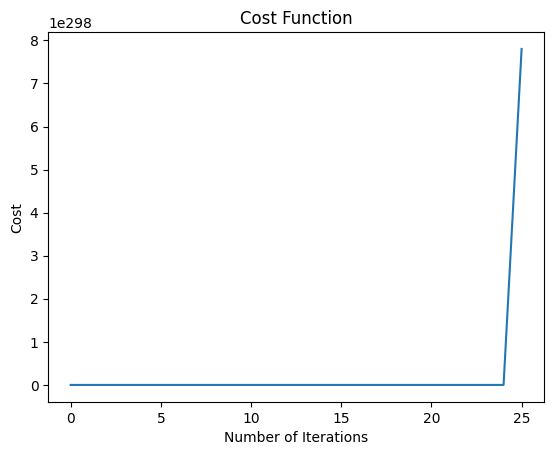

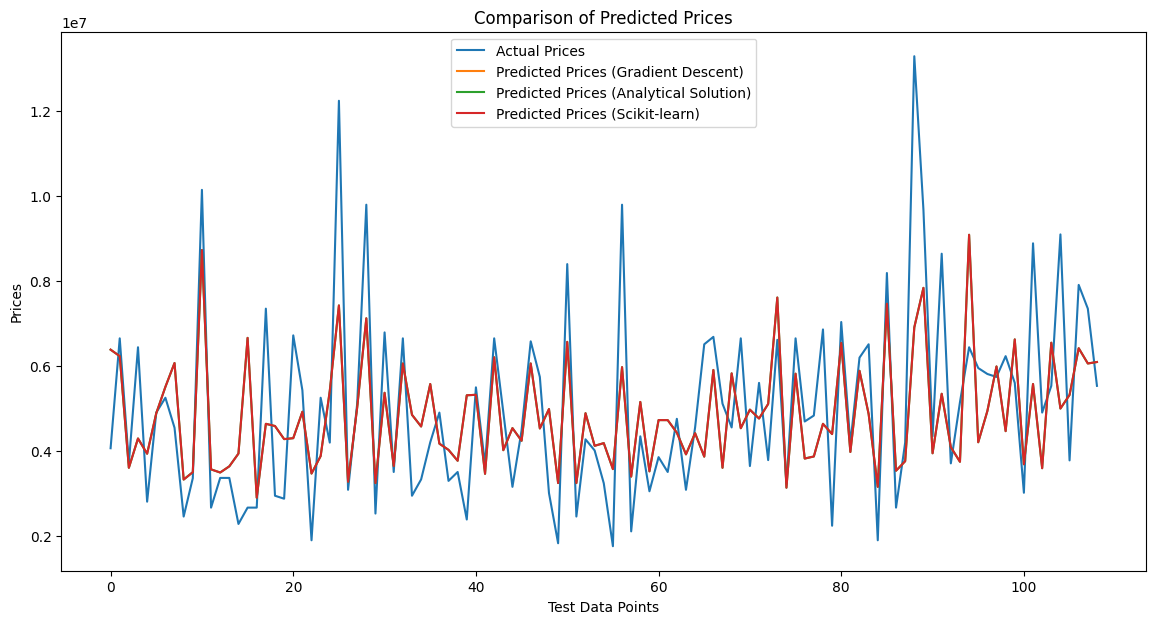

Parameters from Gradient Descent: [nan nan nan nan]
Parameters from Analytical Solution: [5.94853792e+04 3.45466570e+02 1.42231966e+06 3.60197650e+05]
Parameters from Scikit-learn: [0.00000000e+00 3.45466570e+02 1.42231966e+06 3.60197650e+05] 59485.37920871563


In [5]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Завантаження датасету
data = pd.read_csv('house_prices.csv')

# Вибір ознак і цільової змінної
X = data[['area', 'bathrooms', 'bedrooms']].values
y = data['price'].values

# Додавання стовпця одиниць для w_0 (перехоплення)
X = np.c_[np.ones(X.shape[0]), X]

# Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функція гіпотези
def hypothesis(X, w):
    return np.dot(X, w)

# Функція втрат
def compute_cost(X, y, w):
    m = len(y)
    h = hypothesis(X, w)
    return (1/(2*m)) * np.sum((h - y) ** 2)

# Один крок градієнтного спуску
def gradient_descent_step(X, y, w, alpha):
    m = len(y)
    h = hypothesis(X, w)
    w = w - (alpha/m) * np.dot(X.T, (h - y))
    return w

# Функція для знаходження найкращих параметрів
def gradient_descent(X, y, alpha, num_iterations):
    w = np.zeros(X.shape[1])
    cost_history = []
    for i in range(num_iterations):
        w = gradient_descent_step(X, y, w, alpha)
        cost = compute_cost(X, y, w)
        cost_history.append(cost)
    return w, cost_history

# Параметри для градієнтного спуску
alpha = 0.01
num_iterations = 1000

# Навчання моделі
w, cost_history = gradient_descent(X_train, y_train, alpha, num_iterations)

# Відображення функції втрат
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

# Прогнозування на тестовому наборі
y_pred = hypothesis(X_test, w)

# Аналітичне рішення
w_analytical = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Прогнозування на тестовому наборі за аналітичним рішенням
y_pred_analytical = hypothesis(X_test, w_analytical)

# Використання LinearRegression з scikit-learn
model = LinearRegression().fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

# Відображення результатів
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices (Gradient Descent)')
plt.plot(y_pred_analytical, label='Predicted Prices (Analytical Solution)')
plt.plot(y_pred_sklearn, label='Predicted Prices (Scikit-learn)')
plt.legend()
plt.xlabel('Test Data Points')
plt.ylabel('Prices')
plt.title('Comparison of Predicted Prices')
plt.show()

# Вивід параметрів
print('Parameters from Gradient Descent:', w)
print('Parameters from Analytical Solution:', w_analytical)
print('Parameters from Scikit-learn:', model.coef_, model.intercept_)


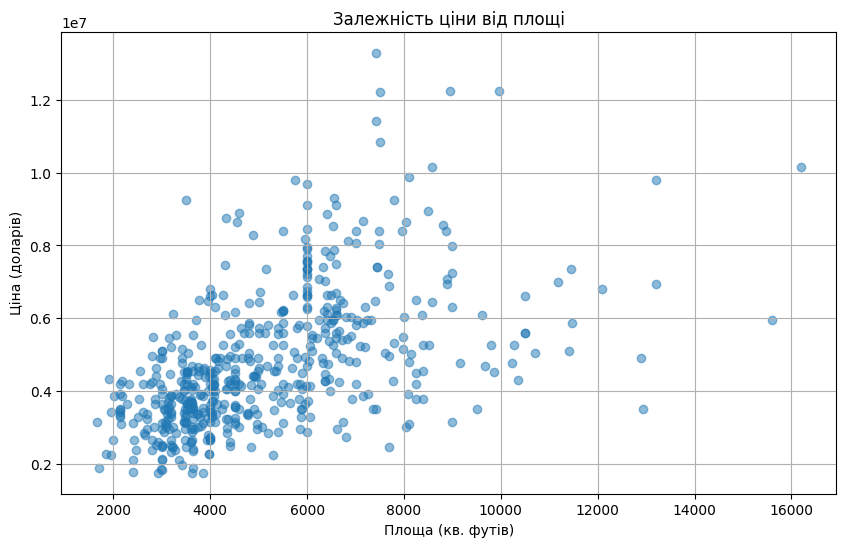

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження датасету
data = pd.read_csv('house_prices.csv')

# Побудова точкового графіка залежності ціни від площі
plt.figure(figsize=(10, 6))
plt.scatter(data['area'], data['price'], alpha=0.5)
plt.title('Залежність ціни від площі')
plt.xlabel('Площа (кв. футів)')
plt.ylabel('Ціна (доларів)')
plt.grid(True)
plt.show()
